# Red Inicial


## Imports


In [1]:
from __future__ import annotations

from time import perf_counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from custom_env.actions import Acciones
from custom_env.router_env import RouterEnv
from custom_env.utils import Color, Location
from gymnasium import make
from gymnasium.utils.env_checker import check_env
from pandas import DataFrame, Series
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.logger import Logger, configure
from stable_baselines3.common.monitor import Monitor

Cargado a las 2025-04-09 00:38:59.293711


In [2]:
name = "./models/Example"
logs_path = "./logs/train/"
models_path = "./models/"
env_id = "RouterEnv-v0"

progress_bar = True
if progress_bar == True:
    import rich
    import tqdm

## Clases y Funciones


In [3]:
tiempo_global: float = 0.0
iteraciones = 0
# Decaorador auxiliar para poder medir el tiempo de las funciones


def medir_tiempo(activado=False):
    def fun(funcion):
        def wrapper(*args, **kwargs):
            if not activado:
                return funcion(*args, **kwargs)
            fun_tiempo = perf_counter
            inicio: float = fun_tiempo()
            resultado = funcion(*args, **kwargs)
            tiempo_total: float = fun_tiempo() - inicio
            global tiempo_global, iteraciones
            medida = 1e6
            t: float = tiempo_total*medida
            tiempo_global += t
            iteraciones += 1
            print(f"Tiempo de ejecución de {
                funcion.__name__}: {t:.2f} micro-segundos")
            return resultado
        return wrapper
    return fun


def calcular_stats_acciones(acciones):
    if isinstance(acciones[-1], int):
        acciones = [Acciones.int_to_action(a) for a in acciones]
    print(f"{Acciones.DENEGAR.name}: {acciones.count(Acciones.DENEGAR)/len(acciones):.2%}")
    print(f"{Acciones.PERMITIR.name}: {acciones.count(Acciones.PERMITIR)/len(acciones):.2%}")

## Entrenamiento


In [4]:
seed = None
env: RouterEnv = make(env_id, seed=seed)

check_env(env)

print("Seed: ", env._np_random_seed)

new_logger: Logger = configure(logs_path, ["stdout", "csv"])
env = Monitor(env, logs_path)


model: PPO = PPO("MultiInputPolicy", env,
                 verbose=True)


model.set_logger(new_logger)
try:
    model.learn(total_timesteps=int(1e5//0.5),
                progress_bar=progress_bar)
except KeyboardInterrupt:
    print("Entrenamiento interrumpido")


g: str = input("¿Desea guardarlo? (s/n) ")
if g.lower() == "s":
    model.save(name)
    print("Modelo guardado")

Seed:  119169338742725998902567702174649047322
Logging to ./logs/train/


Using cpu device
Wrapping the env in a DummyVecEnv.


Output()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 400      |
|    ep_rew_mean     | -42      |
| time/              |          |
|    fps             | 386      |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 2048     |
---------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -573        |
| time/                   |             |
|    fps                  | 295         |
|    iterations           | 2           |
|    time_elapsed         | 13          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009275587 |
|    clip_fraction        | 0.142       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 0.00687     |
|    learning_rate        | 0.0003      |
|    loss                 | 55.6        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0176     |
|    value_loss           | 91          |
-----------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | -607          |
| time/                   |               |
|    fps                  | 312           |
|    iterations           | 3             |
|    time_elapsed         | 19            |
|    total_timesteps      | 6144          |
| train/                  |               |
|    approx_kl            | 0.00019162893 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.683        |
|    explained_variance   | 0.0208        |
|    learning_rate        | 0.0003        |
|    loss                 | 4.93e+03      |
|    n_updates            | 20            |
|    policy_gradient_loss | -0.000733     |
|    value_loss           | 1e+04         |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -537         |
| time/                   |              |
|    fps                  | 329          |
|    iterations           | 4            |
|    time_elapsed         | 24           |
|    total_timesteps      | 8192         |
| train/                  |              |
|    approx_kl            | 3.906354e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.684       |
|    explained_variance   | 0.064        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.66e+03     |
|    n_updates            | 30           |
|    policy_gradient_loss | -4.03e-05    |
|    value_loss           | 4.28e+03     |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | -607          |
| time/                   |               |
|    fps                  | 341           |
|    iterations           | 5             |
|    time_elapsed         | 30            |
|    total_timesteps      | 10240         |
| train/                  |               |
|    approx_kl            | 0.00067666214 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.686        |
|    explained_variance   | 0.127         |
|    learning_rate        | 0.0003        |
|    loss                 | 662           |
|    n_updates            | 40            |
|    policy_gradient_loss | -0.000945     |
|    value_loss           | 1.16e+03      |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | -547          |
| time/                   |               |
|    fps                  | 338           |
|    iterations           | 6             |
|    time_elapsed         | 36            |
|    total_timesteps      | 12288         |
| train/                  |               |
|    approx_kl            | 0.00049334974 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.689        |
|    explained_variance   | 0.105         |
|    learning_rate        | 0.0003        |
|    loss                 | 1.64e+03      |
|    n_updates            | 50            |
|    policy_gradient_loss | -0.00067      |
|    value_loss           | 6.14e+03      |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -468        |
| time/                   |             |
|    fps                  | 353         |
|    iterations           | 7           |
|    time_elapsed         | 40          |
|    total_timesteps      | 14336       |
| train/                  |             |
|    approx_kl            | 0.002534685 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.687      |
|    explained_variance   | 0.15        |
|    learning_rate        | 0.0003      |
|    loss                 | 566         |
|    n_updates            | 60          |
|    policy_gradient_loss | -0.000682   |
|    value_loss           | 784         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -565         |
| time/                   |              |
|    fps                  | 364          |
|    iterations           | 8            |
|    time_elapsed         | 44           |
|    total_timesteps      | 16384        |
| train/                  |              |
|    approx_kl            | 0.0064039584 |
|    clip_fraction        | 0.0537       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.67        |
|    explained_variance   | 0.35         |
|    learning_rate        | 0.0003       |
|    loss                 | 47.4         |
|    n_updates            | 70           |
|    policy_gradient_loss | -0.0078      |
|    value_loss           | 76.5         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -517         |
| time/                   |              |
|    fps                  | 366          |
|    iterations           | 9            |
|    time_elapsed         | 50           |
|    total_timesteps      | 18432        |
| train/                  |              |
|    approx_kl            | 0.0017873019 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.665       |
|    explained_variance   | 0.129        |
|    learning_rate        | 0.0003       |
|    loss                 | 4.84e+03     |
|    n_updates            | 80           |
|    policy_gradient_loss | -0.00142     |
|    value_loss           | 8.96e+03     |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | -463          |
| time/                   |               |
|    fps                  | 369           |
|    iterations           | 10            |
|    time_elapsed         | 55            |
|    total_timesteps      | 20480         |
| train/                  |               |
|    approx_kl            | 0.00017456447 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.672        |
|    explained_variance   | 0.371         |
|    learning_rate        | 0.0003        |
|    loss                 | 248           |
|    n_updates            | 90            |
|    policy_gradient_loss | -0.000263     |
|    value_loss           | 1.28e+03      |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -436        |
| time/                   |             |
|    fps                  | 373         |
|    iterations           | 11          |
|    time_elapsed         | 60          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.004667338 |
|    clip_fraction        | 0.0367      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.655      |
|    explained_variance   | 0.14        |
|    learning_rate        | 0.0003      |
|    loss                 | 56.3        |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.00312    |
|    value_loss           | 84.7        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -417         |
| time/                   |              |
|    fps                  | 374          |
|    iterations           | 12           |
|    time_elapsed         | 65           |
|    total_timesteps      | 24576        |
| train/                  |              |
|    approx_kl            | 0.0019071199 |
|    clip_fraction        | 0.0141       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.656       |
|    explained_variance   | 0.445        |
|    learning_rate        | 0.0003       |
|    loss                 | 527          |
|    n_updates            | 110          |
|    policy_gradient_loss | -0.00134     |
|    value_loss           | 876          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -394         |
| time/                   |              |
|    fps                  | 379          |
|    iterations           | 13           |
|    time_elapsed         | 70           |
|    total_timesteps      | 26624        |
| train/                  |              |
|    approx_kl            | 0.0026545627 |
|    clip_fraction        | 0.0155       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.667       |
|    explained_variance   | 0.435        |
|    learning_rate        | 0.0003       |
|    loss                 | 385          |
|    n_updates            | 120          |
|    policy_gradient_loss | -0.00139     |
|    value_loss           | 1.15e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -366         |
| time/                   |              |
|    fps                  | 384          |
|    iterations           | 14           |
|    time_elapsed         | 74           |
|    total_timesteps      | 28672        |
| train/                  |              |
|    approx_kl            | 0.0011782835 |
|    clip_fraction        | 0.0137       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.668       |
|    explained_variance   | 0.547        |
|    learning_rate        | 0.0003       |
|    loss                 | 426          |
|    n_updates            | 130          |
|    policy_gradient_loss | -0.00102     |
|    value_loss           | 613          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -338        |
| time/                   |             |
|    fps                  | 387         |
|    iterations           | 15          |
|    time_elapsed         | 79          |
|    total_timesteps      | 30720       |
| train/                  |             |
|    approx_kl            | 0.012945573 |
|    clip_fraction        | 0.107       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.617      |
|    explained_variance   | 0.374       |
|    learning_rate        | 0.0003      |
|    loss                 | 34.4        |
|    n_updates            | 140         |
|    policy_gradient_loss | -0.011      |
|    value_loss           | 63.3        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -407        |
| time/                   |             |
|    fps                  | 390         |
|    iterations           | 16          |
|    time_elapsed         | 83          |
|    total_timesteps      | 32768       |
| train/                  |             |
|    approx_kl            | 0.011167317 |
|    clip_fraction        | 0.0934      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.559      |
|    explained_variance   | 0.211       |
|    learning_rate        | 0.0003      |
|    loss                 | 39.7        |
|    n_updates            | 150         |
|    policy_gradient_loss | -0.00929    |
|    value_loss           | 79.7        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -370        |
| time/                   |             |
|    fps                  | 395         |
|    iterations           | 17          |
|    time_elapsed         | 87          |
|    total_timesteps      | 34816       |
| train/                  |             |
|    approx_kl            | 0.005246886 |
|    clip_fraction        | 0.0563      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.59       |
|    explained_variance   | 0.216       |
|    learning_rate        | 0.0003      |
|    loss                 | 6.21e+03    |
|    n_updates            | 160         |
|    policy_gradient_loss | -0.00403    |
|    value_loss           | 1.66e+04    |
-----------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | -348          |
| time/                   |               |
|    fps                  | 400           |
|    iterations           | 18            |
|    time_elapsed         | 91            |
|    total_timesteps      | 36864         |
| train/                  |               |
|    approx_kl            | 6.2044885e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.568        |
|    explained_variance   | 0.265         |
|    learning_rate        | 0.0003        |
|    loss                 | 42.4          |
|    n_updates            | 170           |
|    policy_gradient_loss | -3.99e-05     |
|    value_loss           | 114           |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -330        |
| time/                   |             |
|    fps                  | 404         |
|    iterations           | 19          |
|    time_elapsed         | 96          |
|    total_timesteps      | 38912       |
| train/                  |             |
|    approx_kl            | 0.005085787 |
|    clip_fraction        | 0.0515      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.6        |
|    explained_variance   | 0.7         |
|    learning_rate        | 0.0003      |
|    loss                 | 58.5        |
|    n_updates            | 180         |
|    policy_gradient_loss | -0.00575    |
|    value_loss           | 343         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -320         |
| time/                   |              |
|    fps                  | 407          |
|    iterations           | 20           |
|    time_elapsed         | 100          |
|    total_timesteps      | 40960        |
| train/                  |              |
|    approx_kl            | 0.0018636349 |
|    clip_fraction        | 0.00103      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.597       |
|    explained_variance   | 0.852        |
|    learning_rate        | 0.0003       |
|    loss                 | 67.5         |
|    n_updates            | 190          |
|    policy_gradient_loss | -0.000623    |
|    value_loss           | 170          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -361        |
| time/                   |             |
|    fps                  | 410         |
|    iterations           | 21          |
|    time_elapsed         | 104         |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.008486767 |
|    clip_fraction        | 0.0816      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.611      |
|    explained_variance   | 0.876       |
|    learning_rate        | 0.0003      |
|    loss                 | 59.5        |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.00747    |
|    value_loss           | 117         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -340         |
| time/                   |              |
|    fps                  | 413          |
|    iterations           | 22           |
|    time_elapsed         | 108          |
|    total_timesteps      | 45056        |
| train/                  |              |
|    approx_kl            | 0.0042645605 |
|    clip_fraction        | 0.0321       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.631       |
|    explained_variance   | 0.454        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.96e+03     |
|    n_updates            | 210          |
|    policy_gradient_loss | -0.00712     |
|    value_loss           | 7.08e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -307         |
| time/                   |              |
|    fps                  | 415          |
|    iterations           | 23           |
|    time_elapsed         | 113          |
|    total_timesteps      | 47104        |
| train/                  |              |
|    approx_kl            | 0.0031663263 |
|    clip_fraction        | 0.00293      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.632       |
|    explained_variance   | 0.564        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.82e+03     |
|    n_updates            | 220          |
|    policy_gradient_loss | -0.000656    |
|    value_loss           | 4.42e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -278         |
| time/                   |              |
|    fps                  | 417          |
|    iterations           | 24           |
|    time_elapsed         | 117          |
|    total_timesteps      | 49152        |
| train/                  |              |
|    approx_kl            | 0.0047547137 |
|    clip_fraction        | 0.0619       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.624       |
|    explained_variance   | 0.752        |
|    learning_rate        | 0.0003       |
|    loss                 | 85.7         |
|    n_updates            | 230          |
|    policy_gradient_loss | -0.00449     |
|    value_loss           | 183          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -228         |
| time/                   |              |
|    fps                  | 418          |
|    iterations           | 25           |
|    time_elapsed         | 122          |
|    total_timesteps      | 51200        |
| train/                  |              |
|    approx_kl            | 0.0015038138 |
|    clip_fraction        | 0.00957      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.586       |
|    explained_variance   | 0.0692       |
|    learning_rate        | 0.0003       |
|    loss                 | 40.1         |
|    n_updates            | 240          |
|    policy_gradient_loss | -8.02e-05    |
|    value_loss           | 71.3         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -273         |
| time/                   |              |
|    fps                  | 419          |
|    iterations           | 26           |
|    time_elapsed         | 127          |
|    total_timesteps      | 53248        |
| train/                  |              |
|    approx_kl            | 0.0071537276 |
|    clip_fraction        | 0.0498       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.543       |
|    explained_variance   | 0.402        |
|    learning_rate        | 0.0003       |
|    loss                 | 31.3         |
|    n_updates            | 250          |
|    policy_gradient_loss | -0.00151     |
|    value_loss           | 57.6         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -228         |
| time/                   |              |
|    fps                  | 420          |
|    iterations           | 27           |
|    time_elapsed         | 131          |
|    total_timesteps      | 55296        |
| train/                  |              |
|    approx_kl            | 0.0038215325 |
|    clip_fraction        | 0.0124       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.588       |
|    explained_variance   | 0.544        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.18e+03     |
|    n_updates            | 260          |
|    policy_gradient_loss | -0.00215     |
|    value_loss           | 5.01e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -196         |
| time/                   |              |
|    fps                  | 421          |
|    iterations           | 28           |
|    time_elapsed         | 136          |
|    total_timesteps      | 57344        |
| train/                  |              |
|    approx_kl            | 0.0047684144 |
|    clip_fraction        | 0.0236       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.535       |
|    explained_variance   | 0.61         |
|    learning_rate        | 0.0003       |
|    loss                 | 99.5         |
|    n_updates            | 270          |
|    policy_gradient_loss | -0.00154     |
|    value_loss           | 163          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -190         |
| time/                   |              |
|    fps                  | 422          |
|    iterations           | 29           |
|    time_elapsed         | 140          |
|    total_timesteps      | 59392        |
| train/                  |              |
|    approx_kl            | 0.0027122616 |
|    clip_fraction        | 0.0145       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.551       |
|    explained_variance   | 0.862        |
|    learning_rate        | 0.0003       |
|    loss                 | 213          |
|    n_updates            | 280          |
|    policy_gradient_loss | -0.00417     |
|    value_loss           | 319          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -183        |
| time/                   |             |
|    fps                  | 424         |
|    iterations           | 30          |
|    time_elapsed         | 144         |
|    total_timesteps      | 61440       |
| train/                  |             |
|    approx_kl            | 0.008072954 |
|    clip_fraction        | 0.0657      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.466      |
|    explained_variance   | 0.256       |
|    learning_rate        | 0.0003      |
|    loss                 | 34.8        |
|    n_updates            | 290         |
|    policy_gradient_loss | -0.0051     |
|    value_loss           | 69.6        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -160         |
| time/                   |              |
|    fps                  | 425          |
|    iterations           | 31           |
|    time_elapsed         | 149          |
|    total_timesteps      | 63488        |
| train/                  |              |
|    approx_kl            | 0.0027445776 |
|    clip_fraction        | 0.00923      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.447       |
|    explained_variance   | 0.607        |
|    learning_rate        | 0.0003       |
|    loss                 | 70.6         |
|    n_updates            | 300          |
|    policy_gradient_loss | -0.00129     |
|    value_loss           | 84.2         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -164         |
| time/                   |              |
|    fps                  | 426          |
|    iterations           | 32           |
|    time_elapsed         | 153          |
|    total_timesteps      | 65536        |
| train/                  |              |
|    approx_kl            | 0.0032721732 |
|    clip_fraction        | 0.0244       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.464       |
|    explained_variance   | 0.866        |
|    learning_rate        | 0.0003       |
|    loss                 | 64           |
|    n_updates            | 310          |
|    policy_gradient_loss | -0.00226     |
|    value_loss           | 164          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -149         |
| time/                   |              |
|    fps                  | 427          |
|    iterations           | 33           |
|    time_elapsed         | 158          |
|    total_timesteps      | 67584        |
| train/                  |              |
|    approx_kl            | 0.0013011256 |
|    clip_fraction        | 0.0117       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.5         |
|    explained_variance   | 0.86         |
|    learning_rate        | 0.0003       |
|    loss                 | 212          |
|    n_updates            | 320          |
|    policy_gradient_loss | -0.000203    |
|    value_loss           | 350          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -145         |
| time/                   |              |
|    fps                  | 428          |
|    iterations           | 34           |
|    time_elapsed         | 162          |
|    total_timesteps      | 69632        |
| train/                  |              |
|    approx_kl            | 0.0033944733 |
|    clip_fraction        | 0.0382       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.5         |
|    explained_variance   | 0.835        |
|    learning_rate        | 0.0003       |
|    loss                 | 77.9         |
|    n_updates            | 330          |
|    policy_gradient_loss | -0.00443     |
|    value_loss           | 185          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -82.2        |
| time/                   |              |
|    fps                  | 428          |
|    iterations           | 35           |
|    time_elapsed         | 167          |
|    total_timesteps      | 71680        |
| train/                  |              |
|    approx_kl            | 0.0022546698 |
|    clip_fraction        | 0.019        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.434       |
|    explained_variance   | 0.609        |
|    learning_rate        | 0.0003       |
|    loss                 | 70.9         |
|    n_updates            | 340          |
|    policy_gradient_loss | -0.000247    |
|    value_loss           | 108          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -72.3       |
| time/                   |             |
|    fps                  | 429         |
|    iterations           | 36          |
|    time_elapsed         | 171         |
|    total_timesteps      | 73728       |
| train/                  |             |
|    approx_kl            | 0.002449661 |
|    clip_fraction        | 0.0139      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.494      |
|    explained_variance   | 0.737       |
|    learning_rate        | 0.0003      |
|    loss                 | 51.7        |
|    n_updates            | 350         |
|    policy_gradient_loss | -0.000469   |
|    value_loss           | 136         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -65.4        |
| time/                   |              |
|    fps                  | 430          |
|    iterations           | 37           |
|    time_elapsed         | 176          |
|    total_timesteps      | 75776        |
| train/                  |              |
|    approx_kl            | 0.0014114432 |
|    clip_fraction        | 0.0119       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.469       |
|    explained_variance   | 0.711        |
|    learning_rate        | 0.0003       |
|    loss                 | 42.9         |
|    n_updates            | 360          |
|    policy_gradient_loss | -0.000109    |
|    value_loss           | 86.8         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -66.5        |
| time/                   |              |
|    fps                  | 429          |
|    iterations           | 38           |
|    time_elapsed         | 181          |
|    total_timesteps      | 77824        |
| train/                  |              |
|    approx_kl            | 0.0039993683 |
|    clip_fraction        | 0.0273       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.473       |
|    explained_variance   | 0.608        |
|    learning_rate        | 0.0003       |
|    loss                 | 47.7         |
|    n_updates            | 370          |
|    policy_gradient_loss | -0.00325     |
|    value_loss           | 98.5         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -78.1        |
| time/                   |              |
|    fps                  | 423          |
|    iterations           | 39           |
|    time_elapsed         | 188          |
|    total_timesteps      | 79872        |
| train/                  |              |
|    approx_kl            | 0.0037234116 |
|    clip_fraction        | 0.0156       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.492       |
|    explained_variance   | 0.646        |
|    learning_rate        | 0.0003       |
|    loss                 | 47.6         |
|    n_updates            | 380          |
|    policy_gradient_loss | 5.09e-05     |
|    value_loss           | 74.5         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -72.7        |
| time/                   |              |
|    fps                  | 419          |
|    iterations           | 40           |
|    time_elapsed         | 195          |
|    total_timesteps      | 81920        |
| train/                  |              |
|    approx_kl            | 0.0016476135 |
|    clip_fraction        | 0.0109       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.494       |
|    explained_variance   | 0.68         |
|    learning_rate        | 0.0003       |
|    loss                 | 290          |
|    n_updates            | 390          |
|    policy_gradient_loss | -0.00401     |
|    value_loss           | 695          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -27.8        |
| time/                   |              |
|    fps                  | 418          |
|    iterations           | 41           |
|    time_elapsed         | 200          |
|    total_timesteps      | 83968        |
| train/                  |              |
|    approx_kl            | 0.0016741131 |
|    clip_fraction        | 0.00679      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.493       |
|    explained_variance   | 0.786        |
|    learning_rate        | 0.0003       |
|    loss                 | 72           |
|    n_updates            | 400          |
|    policy_gradient_loss | 0.000575     |
|    value_loss           | 159          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 18.8        |
| time/                   |             |
|    fps                  | 419         |
|    iterations           | 42          |
|    time_elapsed         | 205         |
|    total_timesteps      | 86016       |
| train/                  |             |
|    approx_kl            | 0.005333622 |
|    clip_fraction        | 0.0152      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.488      |
|    explained_variance   | 0.841       |
|    learning_rate        | 0.0003      |
|    loss                 | 73.7        |
|    n_updates            | 410         |
|    policy_gradient_loss | -0.000435   |
|    value_loss           | 144         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 22.3         |
| time/                   |              |
|    fps                  | 420          |
|    iterations           | 43           |
|    time_elapsed         | 209          |
|    total_timesteps      | 88064        |
| train/                  |              |
|    approx_kl            | 0.0047797495 |
|    clip_fraction        | 0.0324       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.418       |
|    explained_variance   | 0.287        |
|    learning_rate        | 0.0003       |
|    loss                 | 38.6         |
|    n_updates            | 420          |
|    policy_gradient_loss | -0.00264     |
|    value_loss           | 87.2         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.41         |
| time/                   |              |
|    fps                  | 421          |
|    iterations           | 44           |
|    time_elapsed         | 213          |
|    total_timesteps      | 90112        |
| train/                  |              |
|    approx_kl            | 0.0046071624 |
|    clip_fraction        | 0.0138       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.444       |
|    explained_variance   | 0.645        |
|    learning_rate        | 0.0003       |
|    loss                 | 59.8         |
|    n_updates            | 430          |
|    policy_gradient_loss | 0.000129     |
|    value_loss           | 99.7         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 27.9         |
| time/                   |              |
|    fps                  | 421          |
|    iterations           | 45           |
|    time_elapsed         | 218          |
|    total_timesteps      | 92160        |
| train/                  |              |
|    approx_kl            | 0.0055389428 |
|    clip_fraction        | 0.00913      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.49        |
|    explained_variance   | 0.666        |
|    learning_rate        | 0.0003       |
|    loss                 | 479          |
|    n_updates            | 440          |
|    policy_gradient_loss | 0.000223     |
|    value_loss           | 1.07e+03     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 36.8        |
| time/                   |             |
|    fps                  | 422         |
|    iterations           | 46          |
|    time_elapsed         | 223         |
|    total_timesteps      | 94208       |
| train/                  |             |
|    approx_kl            | 0.003614727 |
|    clip_fraction        | 0.05        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.49       |
|    explained_variance   | 0.862       |
|    learning_rate        | 0.0003      |
|    loss                 | 135         |
|    n_updates            | 450         |
|    policy_gradient_loss | -0.00536    |
|    value_loss           | 377         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 34.5         |
| time/                   |              |
|    fps                  | 422          |
|    iterations           | 47           |
|    time_elapsed         | 227          |
|    total_timesteps      | 96256        |
| train/                  |              |
|    approx_kl            | 0.0012314515 |
|    clip_fraction        | 0.0147       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.465       |
|    explained_variance   | 0.892        |
|    learning_rate        | 0.0003       |
|    loss                 | 150          |
|    n_updates            | 460          |
|    policy_gradient_loss | -0.000675    |
|    value_loss           | 244          |
------------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 400        |
|    ep_rew_mean          | 31.9       |
| time/                   |            |
|    fps                  | 422        |
|    iterations           | 48         |
|    time_elapsed         | 232        |
|    total_timesteps      | 98304      |
| train/                  |            |
|    approx_kl            | 0.00339094 |
|    clip_fraction        | 0.027      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.435     |
|    explained_variance   | 0.794      |
|    learning_rate        | 0.0003     |
|    loss                 | 322        |
|    n_updates            | 470        |
|    policy_gradient_loss | -0.00391   |
|    value_loss           | 748        |
----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 29.3         |
| time/                   |              |
|    fps                  | 423          |
|    iterations           | 49           |
|    time_elapsed         | 236          |
|    total_timesteps      | 100352       |
| train/                  |              |
|    approx_kl            | 0.0009588243 |
|    clip_fraction        | 0.0101       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.459       |
|    explained_variance   | 0.79         |
|    learning_rate        | 0.0003       |
|    loss                 | 237          |
|    n_updates            | 480          |
|    policy_gradient_loss | -0.00015     |
|    value_loss           | 257          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 36.8         |
| time/                   |              |
|    fps                  | 424          |
|    iterations           | 50           |
|    time_elapsed         | 241          |
|    total_timesteps      | 102400       |
| train/                  |              |
|    approx_kl            | 0.0017026976 |
|    clip_fraction        | 0.00259      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.408       |
|    explained_variance   | 0.748        |
|    learning_rate        | 0.0003       |
|    loss                 | 59.4         |
|    n_updates            | 490          |
|    policy_gradient_loss | -0.000256    |
|    value_loss           | 106          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 42.5         |
| time/                   |              |
|    fps                  | 425          |
|    iterations           | 51           |
|    time_elapsed         | 245          |
|    total_timesteps      | 104448       |
| train/                  |              |
|    approx_kl            | 0.0057425285 |
|    clip_fraction        | 0.0163       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.359       |
|    explained_variance   | 0.311        |
|    learning_rate        | 0.0003       |
|    loss                 | 37.5         |
|    n_updates            | 500          |
|    policy_gradient_loss | -0.00114     |
|    value_loss           | 97.4         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 43.2         |
| time/                   |              |
|    fps                  | 425          |
|    iterations           | 52           |
|    time_elapsed         | 250          |
|    total_timesteps      | 106496       |
| train/                  |              |
|    approx_kl            | 0.0007453984 |
|    clip_fraction        | 0.01         |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.355       |
|    explained_variance   | 0.656        |
|    learning_rate        | 0.0003       |
|    loss                 | 35.1         |
|    n_updates            | 510          |
|    policy_gradient_loss | -0.000176    |
|    value_loss           | 72.6         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 11.2         |
| time/                   |              |
|    fps                  | 426          |
|    iterations           | 53           |
|    time_elapsed         | 254          |
|    total_timesteps      | 108544       |
| train/                  |              |
|    approx_kl            | 0.0049378993 |
|    clip_fraction        | 0.0263       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.415       |
|    explained_variance   | 0.704        |
|    learning_rate        | 0.0003       |
|    loss                 | 89.3         |
|    n_updates            | 520          |
|    policy_gradient_loss | -0.00187     |
|    value_loss           | 145          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 13.9         |
| time/                   |              |
|    fps                  | 426          |
|    iterations           | 54           |
|    time_elapsed         | 259          |
|    total_timesteps      | 110592       |
| train/                  |              |
|    approx_kl            | 0.0011111243 |
|    clip_fraction        | 0.00747      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.396       |
|    explained_variance   | 0.518        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.02e+03     |
|    n_updates            | 530          |
|    policy_gradient_loss | 0.000467     |
|    value_loss           | 3.8e+03      |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | -26.8         |
| time/                   |               |
|    fps                  | 426           |
|    iterations           | 55            |
|    time_elapsed         | 263           |
|    total_timesteps      | 112640        |
| train/                  |               |
|    approx_kl            | 0.00043370132 |
|    clip_fraction        | 0.00591       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.382        |
|    explained_variance   | 0.411         |
|    learning_rate        | 0.0003        |
|    loss                 | 39.7          |
|    n_updates            | 540           |
|    policy_gradient_loss | 1.35e-05      |
|    value_loss           | 97            |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -23.8        |
| time/                   |              |
|    fps                  | 427          |
|    iterations           | 56           |
|    time_elapsed         | 268          |
|    total_timesteps      | 114688       |
| train/                  |              |
|    approx_kl            | 0.0022824104 |
|    clip_fraction        | 0.0254       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.362       |
|    explained_variance   | 0.568        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.52e+03     |
|    n_updates            | 550          |
|    policy_gradient_loss | -0.0004      |
|    value_loss           | 7.84e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -20.4        |
| time/                   |              |
|    fps                  | 427          |
|    iterations           | 57           |
|    time_elapsed         | 273          |
|    total_timesteps      | 116736       |
| train/                  |              |
|    approx_kl            | 0.0031838866 |
|    clip_fraction        | 0.027        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.315       |
|    explained_variance   | 0.371        |
|    learning_rate        | 0.0003       |
|    loss                 | 52.4         |
|    n_updates            | 560          |
|    policy_gradient_loss | -0.00213     |
|    value_loss           | 89.4         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -27.7        |
| time/                   |              |
|    fps                  | 427          |
|    iterations           | 58           |
|    time_elapsed         | 277          |
|    total_timesteps      | 118784       |
| train/                  |              |
|    approx_kl            | 0.0016961733 |
|    clip_fraction        | 0.00454      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.35        |
|    explained_variance   | 0.647        |
|    learning_rate        | 0.0003       |
|    loss                 | 56.8         |
|    n_updates            | 570          |
|    policy_gradient_loss | -0.000169    |
|    value_loss           | 94.5         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -9.57        |
| time/                   |              |
|    fps                  | 427          |
|    iterations           | 59           |
|    time_elapsed         | 282          |
|    total_timesteps      | 120832       |
| train/                  |              |
|    approx_kl            | 0.0037676163 |
|    clip_fraction        | 0.0172       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.368       |
|    explained_variance   | 0.824        |
|    learning_rate        | 0.0003       |
|    loss                 | 128          |
|    n_updates            | 580          |
|    policy_gradient_loss | -0.00473     |
|    value_loss           | 513          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 2.22         |
| time/                   |              |
|    fps                  | 427          |
|    iterations           | 60           |
|    time_elapsed         | 287          |
|    total_timesteps      | 122880       |
| train/                  |              |
|    approx_kl            | 0.0033565653 |
|    clip_fraction        | 0.0125       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.364       |
|    explained_variance   | 0.569        |
|    learning_rate        | 0.0003       |
|    loss                 | 71.8         |
|    n_updates            | 590          |
|    policy_gradient_loss | 0.000151     |
|    value_loss           | 113          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -2.67       |
| time/                   |             |
|    fps                  | 426         |
|    iterations           | 61          |
|    time_elapsed         | 292         |
|    total_timesteps      | 124928      |
| train/                  |             |
|    approx_kl            | 0.000711398 |
|    clip_fraction        | 0.00723     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.334      |
|    explained_variance   | 0.461       |
|    learning_rate        | 0.0003      |
|    loss                 | 53.1        |
|    n_updates            | 600         |
|    policy_gradient_loss | -8.24e-05   |
|    value_loss           | 91.2        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -3.52        |
| time/                   |              |
|    fps                  | 427          |
|    iterations           | 62           |
|    time_elapsed         | 297          |
|    total_timesteps      | 126976       |
| train/                  |              |
|    approx_kl            | 0.0031649917 |
|    clip_fraction        | 0.00898      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.387       |
|    explained_variance   | 0.804        |
|    learning_rate        | 0.0003       |
|    loss                 | 84.5         |
|    n_updates            | 610          |
|    policy_gradient_loss | -0.000724    |
|    value_loss           | 158          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -13          |
| time/                   |              |
|    fps                  | 427          |
|    iterations           | 63           |
|    time_elapsed         | 301          |
|    total_timesteps      | 129024       |
| train/                  |              |
|    approx_kl            | 0.0020972267 |
|    clip_fraction        | 0.0115       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.353       |
|    explained_variance   | 0.816        |
|    learning_rate        | 0.0003       |
|    loss                 | 47.3         |
|    n_updates            | 620          |
|    policy_gradient_loss | 0.000281     |
|    value_loss           | 154          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 0.526        |
| time/                   |              |
|    fps                  | 427          |
|    iterations           | 64           |
|    time_elapsed         | 306          |
|    total_timesteps      | 131072       |
| train/                  |              |
|    approx_kl            | 0.0011240595 |
|    clip_fraction        | 0.0133       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.379       |
|    explained_variance   | 0.819        |
|    learning_rate        | 0.0003       |
|    loss                 | 115          |
|    n_updates            | 630          |
|    policy_gradient_loss | 0.000122     |
|    value_loss           | 184          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 18.9         |
| time/                   |              |
|    fps                  | 427          |
|    iterations           | 65           |
|    time_elapsed         | 311          |
|    total_timesteps      | 133120       |
| train/                  |              |
|    approx_kl            | 0.0036818646 |
|    clip_fraction        | 0.0133       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.373       |
|    explained_variance   | 0.701        |
|    learning_rate        | 0.0003       |
|    loss                 | 338          |
|    n_updates            | 640          |
|    policy_gradient_loss | 0.00037      |
|    value_loss           | 723          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 20.2         |
| time/                   |              |
|    fps                  | 426          |
|    iterations           | 66           |
|    time_elapsed         | 316          |
|    total_timesteps      | 135168       |
| train/                  |              |
|    approx_kl            | 0.0063281497 |
|    clip_fraction        | 0.0146       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.324       |
|    explained_variance   | 0.404        |
|    learning_rate        | 0.0003       |
|    loss                 | 48.3         |
|    n_updates            | 650          |
|    policy_gradient_loss | -0.000425    |
|    value_loss           | 111          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 36.3         |
| time/                   |              |
|    fps                  | 427          |
|    iterations           | 67           |
|    time_elapsed         | 321          |
|    total_timesteps      | 137216       |
| train/                  |              |
|    approx_kl            | 0.0006517612 |
|    clip_fraction        | 0.00513      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.327       |
|    explained_variance   | 0.517        |
|    learning_rate        | 0.0003       |
|    loss                 | 74.8         |
|    n_updates            | 660          |
|    policy_gradient_loss | -0.000334    |
|    value_loss           | 92.5         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 27.1         |
| time/                   |              |
|    fps                  | 427          |
|    iterations           | 68           |
|    time_elapsed         | 325          |
|    total_timesteps      | 139264       |
| train/                  |              |
|    approx_kl            | 0.0035752766 |
|    clip_fraction        | 0.0123       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.336       |
|    explained_variance   | 0.568        |
|    learning_rate        | 0.0003       |
|    loss                 | 50.2         |
|    n_updates            | 670          |
|    policy_gradient_loss | 0.000115     |
|    value_loss           | 95.6         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 29.6         |
| time/                   |              |
|    fps                  | 427          |
|    iterations           | 69           |
|    time_elapsed         | 330          |
|    total_timesteps      | 141312       |
| train/                  |              |
|    approx_kl            | 0.0016394823 |
|    clip_fraction        | 0.0083       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.382       |
|    explained_variance   | 0.845        |
|    learning_rate        | 0.0003       |
|    loss                 | 116          |
|    n_updates            | 680          |
|    policy_gradient_loss | -0.00184     |
|    value_loss           | 326          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 30.2         |
| time/                   |              |
|    fps                  | 427          |
|    iterations           | 70           |
|    time_elapsed         | 335          |
|    total_timesteps      | 143360       |
| train/                  |              |
|    approx_kl            | 0.0014628144 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.285       |
|    explained_variance   | 0.429        |
|    learning_rate        | 0.0003       |
|    loss                 | 52.5         |
|    n_updates            | 690          |
|    policy_gradient_loss | -8.78e-05    |
|    value_loss           | 99.7         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 34.5         |
| time/                   |              |
|    fps                  | 428          |
|    iterations           | 71           |
|    time_elapsed         | 339          |
|    total_timesteps      | 145408       |
| train/                  |              |
|    approx_kl            | 0.0011177552 |
|    clip_fraction        | 0.00483      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.29        |
|    explained_variance   | 0.616        |
|    learning_rate        | 0.0003       |
|    loss                 | 27.2         |
|    n_updates            | 700          |
|    policy_gradient_loss | 9.43e-05     |
|    value_loss           | 82.8         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 32.4         |
| time/                   |              |
|    fps                  | 428          |
|    iterations           | 72           |
|    time_elapsed         | 344          |
|    total_timesteps      | 147456       |
| train/                  |              |
|    approx_kl            | 0.0024309233 |
|    clip_fraction        | 0.0227       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.307       |
|    explained_variance   | 0.481        |
|    learning_rate        | 0.0003       |
|    loss                 | 42.2         |
|    n_updates            | 710          |
|    policy_gradient_loss | -0.00317     |
|    value_loss           | 109          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 54.4         |
| time/                   |              |
|    fps                  | 428          |
|    iterations           | 73           |
|    time_elapsed         | 349          |
|    total_timesteps      | 149504       |
| train/                  |              |
|    approx_kl            | 0.0030626957 |
|    clip_fraction        | 0.0423       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.348       |
|    explained_variance   | 0.881        |
|    learning_rate        | 0.0003       |
|    loss                 | 45.3         |
|    n_updates            | 720          |
|    policy_gradient_loss | -0.00393     |
|    value_loss           | 147          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 46.5        |
| time/                   |             |
|    fps                  | 427         |
|    iterations           | 74          |
|    time_elapsed         | 354         |
|    total_timesteps      | 151552      |
| train/                  |             |
|    approx_kl            | 0.003149488 |
|    clip_fraction        | 0.0115      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.39       |
|    explained_variance   | 0.777       |
|    learning_rate        | 0.0003      |
|    loss                 | 215         |
|    n_updates            | 730         |
|    policy_gradient_loss | 0.000226    |
|    value_loss           | 403         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 84.5        |
| time/                   |             |
|    fps                  | 428         |
|    iterations           | 75          |
|    time_elapsed         | 358         |
|    total_timesteps      | 153600      |
| train/                  |             |
|    approx_kl            | 0.002727314 |
|    clip_fraction        | 0.0336      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.353      |
|    explained_variance   | 0.904       |
|    learning_rate        | 0.0003      |
|    loss                 | 125         |
|    n_updates            | 740         |
|    policy_gradient_loss | -0.00108    |
|    value_loss           | 183         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 400        |
|    ep_rew_mean          | 81.7       |
| time/                   |            |
|    fps                  | 428        |
|    iterations           | 76         |
|    time_elapsed         | 363        |
|    total_timesteps      | 155648     |
| train/                  |            |
|    approx_kl            | 0.00418385 |
|    clip_fraction        | 0.0363     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.38      |
|    explained_variance   | 0.69       |
|    learning_rate        | 0.0003     |
|    loss                 | 61.2       |
|    n_updates            | 750        |
|    policy_gradient_loss | -0.00274   |
|    value_loss           | 106        |
----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 68.6         |
| time/                   |              |
|    fps                  | 428          |
|    iterations           | 77           |
|    time_elapsed         | 367          |
|    total_timesteps      | 157696       |
| train/                  |              |
|    approx_kl            | 0.0013980872 |
|    clip_fraction        | 0.00991      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.307       |
|    explained_variance   | 0.843        |
|    learning_rate        | 0.0003       |
|    loss                 | 51.3         |
|    n_updates            | 760          |
|    policy_gradient_loss | 0.000231     |
|    value_loss           | 163          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 69.2         |
| time/                   |              |
|    fps                  | 428          |
|    iterations           | 78           |
|    time_elapsed         | 372          |
|    total_timesteps      | 159744       |
| train/                  |              |
|    approx_kl            | 0.0020801984 |
|    clip_fraction        | 0.0119       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.342       |
|    explained_variance   | 0.827        |
|    learning_rate        | 0.0003       |
|    loss                 | 124          |
|    n_updates            | 770          |
|    policy_gradient_loss | -0.00195     |
|    value_loss           | 336          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 56.4         |
| time/                   |              |
|    fps                  | 429          |
|    iterations           | 79           |
|    time_elapsed         | 377          |
|    total_timesteps      | 161792       |
| train/                  |              |
|    approx_kl            | 0.0020553423 |
|    clip_fraction        | 0.00723      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.38        |
|    explained_variance   | 0.817        |
|    learning_rate        | 0.0003       |
|    loss                 | 82.8         |
|    n_updates            | 780          |
|    policy_gradient_loss | 0.000266     |
|    value_loss           | 237          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 54.8         |
| time/                   |              |
|    fps                  | 428          |
|    iterations           | 80           |
|    time_elapsed         | 382          |
|    total_timesteps      | 163840       |
| train/                  |              |
|    approx_kl            | 0.0020077447 |
|    clip_fraction        | 0.0215       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.339       |
|    explained_variance   | 0.886        |
|    learning_rate        | 0.0003       |
|    loss                 | 239          |
|    n_updates            | 790          |
|    policy_gradient_loss | -0.00334     |
|    value_loss           | 291          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 51.2         |
| time/                   |              |
|    fps                  | 428          |
|    iterations           | 81           |
|    time_elapsed         | 386          |
|    total_timesteps      | 165888       |
| train/                  |              |
|    approx_kl            | 0.0029654717 |
|    clip_fraction        | 0.0133       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.376       |
|    explained_variance   | 0.82         |
|    learning_rate        | 0.0003       |
|    loss                 | 66.3         |
|    n_updates            | 800          |
|    policy_gradient_loss | -0.000791    |
|    value_loss           | 173          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 61.1         |
| time/                   |              |
|    fps                  | 429          |
|    iterations           | 82           |
|    time_elapsed         | 391          |
|    total_timesteps      | 167936       |
| train/                  |              |
|    approx_kl            | 0.0035879852 |
|    clip_fraction        | 0.0114       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.395       |
|    explained_variance   | 0.688        |
|    learning_rate        | 0.0003       |
|    loss                 | 87           |
|    n_updates            | 810          |
|    policy_gradient_loss | -0.000432    |
|    value_loss           | 192          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 77.4         |
| time/                   |              |
|    fps                  | 429          |
|    iterations           | 83           |
|    time_elapsed         | 396          |
|    total_timesteps      | 169984       |
| train/                  |              |
|    approx_kl            | 0.0008535358 |
|    clip_fraction        | 0.0168       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.345       |
|    explained_variance   | 0.393        |
|    learning_rate        | 0.0003       |
|    loss                 | 46.4         |
|    n_updates            | 820          |
|    policy_gradient_loss | 0.000905     |
|    value_loss           | 92.5         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 77.6        |
| time/                   |             |
|    fps                  | 429         |
|    iterations           | 84          |
|    time_elapsed         | 400         |
|    total_timesteps      | 172032      |
| train/                  |             |
|    approx_kl            | 0.005117293 |
|    clip_fraction        | 0.0487      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.359      |
|    explained_variance   | 0.765       |
|    learning_rate        | 0.0003      |
|    loss                 | 64.8        |
|    n_updates            | 830         |
|    policy_gradient_loss | -0.00195    |
|    value_loss           | 120         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 74.9         |
| time/                   |              |
|    fps                  | 429          |
|    iterations           | 85           |
|    time_elapsed         | 405          |
|    total_timesteps      | 174080       |
| train/                  |              |
|    approx_kl            | 0.0015038499 |
|    clip_fraction        | 0.00654      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.332       |
|    explained_variance   | 0.484        |
|    learning_rate        | 0.0003       |
|    loss                 | 35.9         |
|    n_updates            | 840          |
|    policy_gradient_loss | -0.000629    |
|    value_loss           | 88.1         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 37.8         |
| time/                   |              |
|    fps                  | 428          |
|    iterations           | 86           |
|    time_elapsed         | 410          |
|    total_timesteps      | 176128       |
| train/                  |              |
|    approx_kl            | 0.0005039936 |
|    clip_fraction        | 0.00757      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.373       |
|    explained_variance   | 0.537        |
|    learning_rate        | 0.0003       |
|    loss                 | 40.4         |
|    n_updates            | 850          |
|    policy_gradient_loss | -0.00031     |
|    value_loss           | 94           |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 40.6         |
| time/                   |              |
|    fps                  | 428          |
|    iterations           | 87           |
|    time_elapsed         | 415          |
|    total_timesteps      | 178176       |
| train/                  |              |
|    approx_kl            | 0.0023363857 |
|    clip_fraction        | 0.0172       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.387       |
|    explained_variance   | 0.511        |
|    learning_rate        | 0.0003       |
|    loss                 | 914          |
|    n_updates            | 860          |
|    policy_gradient_loss | 0.00162      |
|    value_loss           | 2.58e+03     |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 3.28          |
| time/                   |               |
|    fps                  | 428           |
|    iterations           | 88            |
|    time_elapsed         | 420           |
|    total_timesteps      | 180224        |
| train/                  |               |
|    approx_kl            | 0.00070902926 |
|    clip_fraction        | 0.00615       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.32         |
|    explained_variance   | 0.535         |
|    learning_rate        | 0.0003        |
|    loss                 | 61.1          |
|    n_updates            | 870           |
|    policy_gradient_loss | -0.000645     |
|    value_loss           | 95            |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 2.66        |
| time/                   |             |
|    fps                  | 429         |
|    iterations           | 89          |
|    time_elapsed         | 424         |
|    total_timesteps      | 182272      |
| train/                  |             |
|    approx_kl            | 0.006783042 |
|    clip_fraction        | 0.0383      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.34       |
|    explained_variance   | 0.663       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.5e+03     |
|    n_updates            | 880         |
|    policy_gradient_loss | -0.00743    |
|    value_loss           | 6.46e+03    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 0.241        |
| time/                   |              |
|    fps                  | 428          |
|    iterations           | 90           |
|    time_elapsed         | 429          |
|    total_timesteps      | 184320       |
| train/                  |              |
|    approx_kl            | 0.0014479271 |
|    clip_fraction        | 0.011        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.328       |
|    explained_variance   | 0.485        |
|    learning_rate        | 0.0003       |
|    loss                 | 55.5         |
|    n_updates            | 890          |
|    policy_gradient_loss | -0.000169    |
|    value_loss           | 116          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -1.12       |
| time/                   |             |
|    fps                  | 429         |
|    iterations           | 91          |
|    time_elapsed         | 434         |
|    total_timesteps      | 186368      |
| train/                  |             |
|    approx_kl            | 0.002116209 |
|    clip_fraction        | 0.0112      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.34       |
|    explained_variance   | 0.508       |
|    learning_rate        | 0.0003      |
|    loss                 | 45.1        |
|    n_updates            | 900         |
|    policy_gradient_loss | -3.51e-05   |
|    value_loss           | 103         |
-----------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | -16.7         |
| time/                   |               |
|    fps                  | 429           |
|    iterations           | 92            |
|    time_elapsed         | 438           |
|    total_timesteps      | 188416        |
| train/                  |               |
|    approx_kl            | 0.00015486318 |
|    clip_fraction        | 0.00171       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.301        |
|    explained_variance   | 0.635         |
|    learning_rate        | 0.0003        |
|    loss                 | 92.2          |
|    n_updates            | 910           |
|    policy_gradient_loss | -0.000475     |
|    value_loss           | 279           |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -54.6        |
| time/                   |              |
|    fps                  | 429          |
|    iterations           | 93           |
|    time_elapsed         | 443          |
|    total_timesteps      | 190464       |
| train/                  |              |
|    approx_kl            | 0.0025443258 |
|    clip_fraction        | 0.0273       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.312       |
|    explained_variance   | 0.844        |
|    learning_rate        | 0.0003       |
|    loss                 | 519          |
|    n_updates            | 920          |
|    policy_gradient_loss | 0.00315      |
|    value_loss           | 1.6e+03      |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -49.4        |
| time/                   |              |
|    fps                  | 430          |
|    iterations           | 94           |
|    time_elapsed         | 447          |
|    total_timesteps      | 192512       |
| train/                  |              |
|    approx_kl            | 0.0010325493 |
|    clip_fraction        | 0.0395       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.317       |
|    explained_variance   | 0.823        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.03e+03     |
|    n_updates            | 930          |
|    policy_gradient_loss | -0.0035      |
|    value_loss           | 4.21e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -82.4        |
| time/                   |              |
|    fps                  | 430          |
|    iterations           | 95           |
|    time_elapsed         | 452          |
|    total_timesteps      | 194560       |
| train/                  |              |
|    approx_kl            | 0.0005239949 |
|    clip_fraction        | 0.000488     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.291       |
|    explained_variance   | 0.459        |
|    learning_rate        | 0.0003       |
|    loss                 | 121          |
|    n_updates            | 940          |
|    policy_gradient_loss | -0.000224    |
|    value_loss           | 309          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -85.8        |
| time/                   |              |
|    fps                  | 429          |
|    iterations           | 96           |
|    time_elapsed         | 457          |
|    total_timesteps      | 196608       |
| train/                  |              |
|    approx_kl            | 0.0019234099 |
|    clip_fraction        | 0.023        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.326       |
|    explained_variance   | 0.758        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.19e+03     |
|    n_updates            | 950          |
|    policy_gradient_loss | -0.002       |
|    value_loss           | 3.44e+03     |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | -72.6         |
| time/                   |               |
|    fps                  | 429           |
|    iterations           | 97            |
|    time_elapsed         | 462           |
|    total_timesteps      | 198656        |
| train/                  |               |
|    approx_kl            | 0.00038650073 |
|    clip_fraction        | 0.00112       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.28         |
|    explained_variance   | 0.778         |
|    learning_rate        | 0.0003        |
|    loss                 | 79.8          |
|    n_updates            | 960           |
|    policy_gradient_loss | 3.38e-05      |
|    value_loss           | 224           |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -60          |
| time/                   |              |
|    fps                  | 429          |
|    iterations           | 98           |
|    time_elapsed         | 466          |
|    total_timesteps      | 200704       |
| train/                  |              |
|    approx_kl            | 0.0025658235 |
|    clip_fraction        | 0.00933      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.312       |
|    explained_variance   | 0.512        |
|    learning_rate        | 0.0003       |
|    loss                 | 54.8         |
|    n_updates            | 970          |
|    policy_gradient_loss | -0.00172     |
|    value_loss           | 117          |
------------------------------------------


Modelo guardado


### Gráficas de Entrenamiento


Avaliable metrics:  ['time/total_timesteps', 'rollout/ep_rew_mean', 'time/fps', 'time/time_elapsed', 'rollout/ep_len_mean', 'time/iterations', 'train/n_updates', 'train/loss', 'train/entropy_loss', 'train/approx_kl', 'train/clip_fraction', 'train/value_loss', 'train/learning_rate', 'train/explained_variance', 'train/clip_range', 'train/policy_gradient_loss']


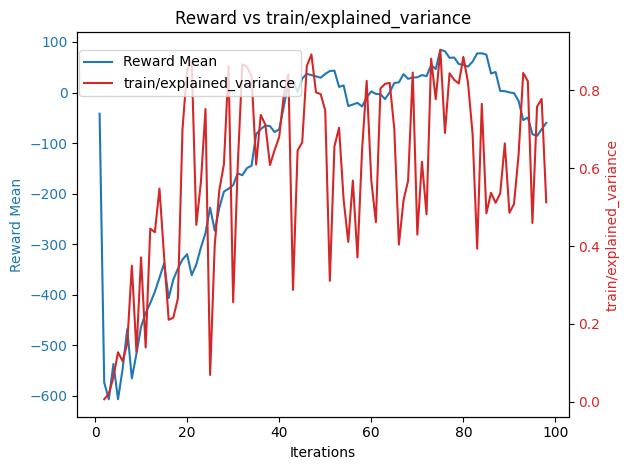

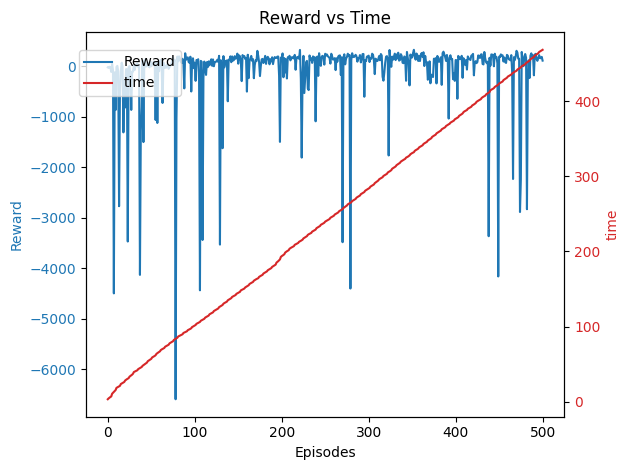

In [4]:
train_data_log: DataFrame = pd.read_csv(logs_path+"progress.csv")
train_data_monitor: DataFrame = pd.read_csv(logs_path+"monitor.csv", header=1)


print("Avaliable metrics: ", train_data_log.columns.to_list())

fig, ax1 = plt.subplots()

iterations: Series[int] = train_data_log['time/iterations'].astype(int)


ax1.set_xlabel('Iterations')
color = Color.BLUE.value
ax1.set_ylabel('Reward Mean', color=color)
ax1.plot(iterations,
         train_data_log['rollout/ep_rew_mean'], color=color, label='Reward Mean')
ax1.tick_params(axis='y', labelcolor=color)


col = 'train/explained_variance'

ax2 = ax1.twinx()
color = Color.RED.value
ax2.set_ylabel(col, color=color)
ax2.plot(iterations, train_data_log[col], color=color, label=col)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_title('Reward vs ' + col)


fig.tight_layout()
fig.legend(loc=Location.UPPER_LEFT.value, bbox_to_anchor=(0.12, 0.9))

plt.show()


fig, ax1 = plt.subplots()

episodes = range(len(train_data_monitor['l']))


ax1.set_xlabel('Episodes')
color = Color.BLUE.value
ax1.set_ylabel('Reward', color=color)
ax1.plot(episodes, train_data_monitor['r'], color=color, label='Reward')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Reward vs Time')


ax2 = ax1.twinx()
color = Color.RED.value
ax2.set_ylabel('time', color=color)
ax2.plot(episodes, train_data_monitor['t'], color=color, label='time')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc=Location.UPPER_LEFT.value, bbox_to_anchor=(0.12, 0.9))

plt.show()

## Comprobación funcionamiento


In [5]:
seed = 289980628190634006122751570777790489191
env = make(env_id, seed=seed)
seed: int = env.np_random_seed
model = PPO.load(name, print_system_info=True)

num_steps = 1
obs, _ = env.reset(seed=seed)
# Variables de información:

stats = []
rewards = []

# -------------------------

_states = None
ant = env._get_info()
for episode in range(num_steps):

    done = False
    step_counter = 0
    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, terminated, info = env.step(action)

        stats.append(info["Stats"])
        rewards.append(reward)

        done: bool = done or terminated

    env.reset(seed=seed)
    step_counter += 1

# Debug
acciones = [x["Action"] for x in stats]
calcular_stats_acciones(acciones)

print(f"Seed: {env.np_random_seed}")

== CURRENT SYSTEM INFO ==
- OS: Windows-10-10.0.19045-SP0 10.0.19045
- Python: 3.12.6
- Stable-Baselines3: 2.4.1
- PyTorch: 2.5.1+cpu
- GPU Enabled: False
- Numpy: 1.26.4
- Cloudpickle: 3.1.0
- Gymnasium: 1.0.0

== SAVED MODEL SYSTEM INFO ==
- OS: Windows-10-10.0.19045-SP0 10.0.19045
- Python: 3.12.6
- Stable-Baselines3: 2.4.1
- PyTorch: 2.5.1+cpu
- GPU Enabled: False
- Numpy: 1.26.4
- Cloudpickle: 3.1.0
- Gymnasium: 1.0.0

DENEGAR: 13.50%
PERMITIR: 86.50%
Seed: 289980628190634006122751570777790489191


In [6]:
assert len(acciones) != acciones.count(
    Acciones.DENEGAR), "Se han denegado todos los paquetes"
assert len(acciones) != acciones.count(
    Acciones.PERMITIR), "Se han permitido todos los paquetes"

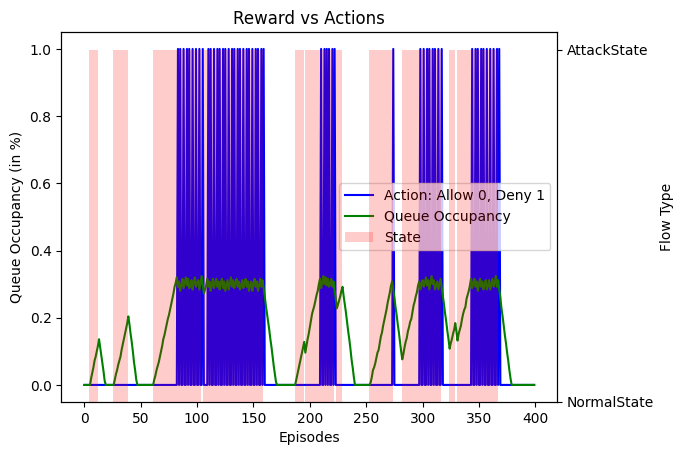

Rewards:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98, 0.964, 0.948, 0.928, 0.916, 0.9, 0.884, 0.864, 0.888, 0.912, 0.9359999999999999, 0.96, 0.988, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.984, 0.968, 0.956, 0.94, 0.928, 0.916, 0.896, 0.88, 0.864, 0.848, 0.832, 0.8160000000000001, 0.796, 0.8200000000000001, 0.848, 0.872, 0.9, 0.9319999999999999, 0.956, 0.984, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.984, 0.972, 0.956, 0.944, 0.9319999999999999, 0.916, 0.9, 0.884, 0.864, 0.852, 0.836, 0.8200000000000001, 0.804, 0.792, 0.776, 0.76, 0.744, 0.728, 0.708, 0.696, 0.6799999999999999, -2.7487736, 0.692, -2.498824, 0.704, 0.6839999999999999, -2.7487904, 0.696, 0.6799999999999999, -2.4989344, 0.6839999999999999, -2.4987904, 0.704, 0.688, -2.4988072, 0.696, 0.6799999999999999, -2.7487736, 0.696, 0.688, -2.4988072, 0.696, 0.6759999999999999, 0.704, 0.728, 0.716, 0.704, 0.6839999999999999, -2.4989488, 0.692, -2.748824, 0.704, 0.6839999999999999, -2.7487904, 0.696, 0.68

In [7]:
assert len(acciones) == len(rewards)
# plt.plot(rewards, label="rewards")

fig, ax1 = plt.subplots()
ocu = [x["OcupacionActual"] for x in stats]
estados = [x["EstadoMaquina"] for x in stats]
acciones = [Acciones.action_to_int(x["Action"]) for x in stats]

# Primer eje Y con acciones y ocupación de cola
ax1.plot(
    acciones, label=f"Action: Allow {Acciones.action_to_int(Acciones.PERMITIR)}, Deny {Acciones.action_to_int(Acciones.DENEGAR)}", color='#0000FF')
ax1.plot(ocu, label="Queue Occupancy", color='green')
ax1.set_xlabel("Episodes")
ax1.set_ylabel("Queue Occupancy (in %)")
ax1.set_title("Reward vs Actions")

# Segundo eje Y con estados en gráfico de barras
ax2 = ax1.twinx()
ax2.bar(range(len(estados)), estados, color='red',
        label="State", alpha=0.20, width=1)
ax2.set_ylabel("Flow Type")

# Combinar leyendas de ambos ejes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)

plt.show()


print("Rewards: ", rewards)
calcular_stats_acciones(acciones)

Ocupación:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.036, 0.052, 0.072, 0.084, 0.1, 0.116, 0.136, 0.112, 0.088, 0.064, 0.04, 0.012, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016, 0.032, 0.044, 0.06, 0.072, 0.084, 0.104, 0.12, 0.136, 0.152, 0.168, 0.184, 0.204, 0.18, 0.152, 0.128, 0.1, 0.068, 0.044, 0.016, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016, 0.028, 0.044, 0.056, 0.068, 0.084, 0.1, 0.116, 0.136, 0.148, 0.164, 0.18, 0.196, 0.208, 0.224, 0.24, 0.256, 0.272, 0.292, 0.304, 0.32, 0.292, 0.308, 0.28, 0.296, 0.316, 0.288, 0.304, 0.32, 0.296, 0.316, 0.288, 0.296, 0.312, 0.284, 0.304, 0.32, 0.292, 0.304, 0.312, 0.284, 0.304, 0.324, 0.296, 0.272, 0.284, 0.296, 0.316, 0.292, 0.308, 0.28, 0.296, 0.316, 0.288, 0.304, 0.316, 0.292, 0.308, 0.284, 0.304, 0.316, 0.288, 0.308, 0.28, 0.296, 0.312, 0.284, 0.3, 0.32, 0.292, 0.312, 0.288, 0.304, 0.316, 0.292, 0.308, 0.284, 0.296, 0.312, 0.288, 0.304, 0.316, 0.292, 0.308, 0.28, 0.296, 0.308, 0.28, 0.3, 0.316, 0.292, 

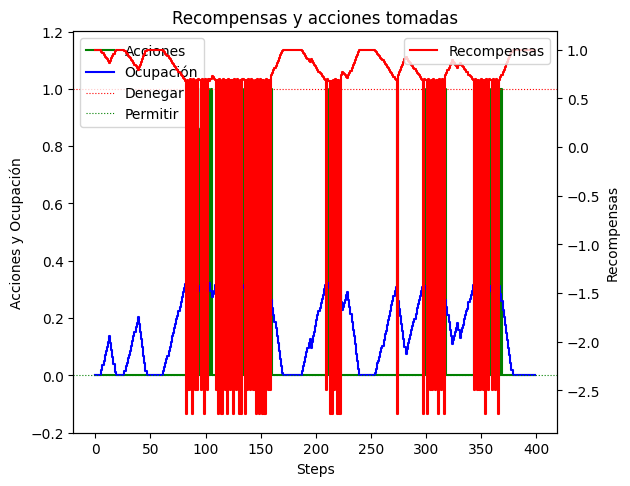

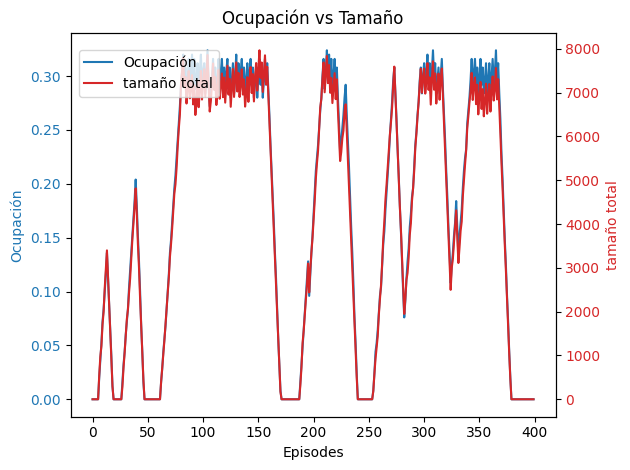

La ocupación máxima es de 32%
La ocupación mínima es de 0%


In [8]:
print("Ocupación: ", ocu)
fig, ax1 = plt.subplots()

# Configurar el eje X e Y
ax1.set_xlabel('Steps')
ax1.set_ylabel('Acciones y Ocupación')

# Graficar las acciones y la ocupación
ax1.step(range(len(acciones)), acciones,
         label="Acciones", where='post', color='green')
ax1.step(range(len(ocu)), ocu, label="Ocupación", where='mid', color='blue')


# Agregar marca en el eje Y
ticks = list(ax1.get_yticks())  # Obtener los ticks actuales

ax1.set_yticks(sorted(ticks))  # Actualizar los ticks


ax1.axhline(y=Acciones.action_to_int(Acciones.DENEGAR), color='red',
            linestyle='dotted', linewidth=0.8, label='Denegar')
ax1.axhline(y=Acciones.action_to_int(Acciones.PERMITIR),
            color='green', linestyle='dotted', linewidth=0.8, label='Permitir')


# Leyenda del primer eje
ax1.legend(loc=Location.UPPER_LEFT.value)

# Crear segundo eje Y para las recompensas
ax2 = ax1.twinx()
ax2.set_ylabel('Recompensas')
ax2.step(range(len(rewards)), rewards,
         label="Recompensas", where='mid', color='r')

# Leyenda del segundo eje
ax2.legend(loc=Location.UPPER_RIGHT.value)

# Ajustar diseño y mostrar título
fig.tight_layout()
plt.title("Recompensas y acciones tomadas")
plt.show()


tam = [x["TamañoTotal"] for x in stats]


fig, ax1 = plt.subplots()

train_data_monitor: DataFrame = pd.read_csv(logs_path+"monitor.csv", header=1)

episodes = range(len(train_data_monitor['l']))

# Plot rollout/ep_rew_mean on the first y-axis
ax1.set_xlabel('Episodes')
color = Color.BLUE.value
label = 'Ocupación'
ax1.set_ylabel(label, color=color)
ax1.plot(range(len(ocu)), ocu, color=color, label=label)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Ocupación vs Tamaño')


ax2 = ax1.twinx()
color = Color.RED.value
label = 'tamaño total'
ax2.set_ylabel(label, color=color)
ax2.plot(range(len(tam)), tam, color=color, label=label)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc=Location.UPPER_LEFT.value, bbox_to_anchor=(0.12, 0.9))

plt.show()

print(f"La ocupación máxima es de {np.max(ocu):.0%}")
print(f"La ocupación mínima es de {np.min(ocu):.0%}")